In [5]:
# Análise de dados realizada a partir da base de dados de vendas Adventureworks fornecida pela Microsoft.

In [15]:
# Importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Importando a base de dados Adventureworks

df = pd.read_excel("datasets\AdventureWorks.xlsx")

In [130]:
# Primeira visualização da planilha com o intuito de definir perguntas para a partir disso iniciar a análise de dados.

display(df)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo Total,Lucro,Tempo de envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,5 days
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,6 days
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.00,4548.00,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,7 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.0,6,419.58,5574.42,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,3588.48,13 days
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,11 days
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.0,6,1176.00,4704.00,Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1948.14,2755.86,4 days
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.0,6,1198.80,4795.20,Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,1985.94,2809.26,4 days


In [ ]:
# Perguntas a serem respondidas:

# 1- Qual o custo total de cada marca? 
# 2- Qual o lucro real de cada venda?
# 3- Qual o Lucro de cada marca por ano?
# 4- O lucro aumentou de 2008 para 2009?
# 5- Qual é o tempo de envio dos produtos?
# 6- Quais os produtos mais vendidos?
# 7- Quais produtos são mais lucrativos?

In [103]:
# Após a primeira visualização, é muito importante verificar se a planilha importada possui erros como dados faltantes:

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 904 entries, 0 to 903
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Data Venda      904 non-null    datetime64[ns] 
 1   Data Envio      904 non-null    datetime64[ns] 
 2   ID Loja         904 non-null    int64          
 3   ID Produto      904 non-null    int64          
 4   ID Cliente      904 non-null    int64          
 5   No. Venda       904 non-null    object         
 6   Custo Unitário  904 non-null    float64        
 7   Preço Unitário  904 non-null    float64        
 8   Quantidade      904 non-null    int64          
 9   Valor Desconto  904 non-null    float64        
 10  Valor Venda     904 non-null    float64        
 11  Produto         904 non-null    object         
 12  Fabricante      904 non-null    object         
 13  Marca           904 non-null    object         
 14  Classe          904 non-null    object    

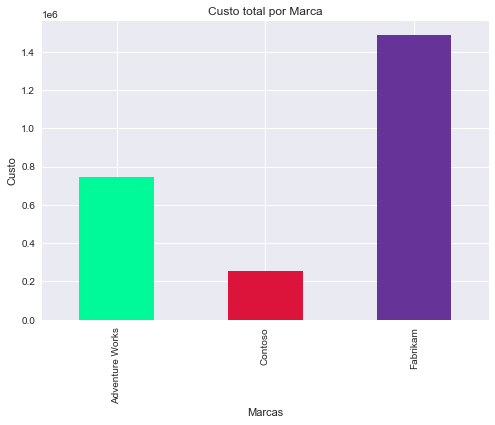

In [138]:
# Tudo ok com a base de dados! Agora iniciaremos a análise exploratória respondendo cada pergunta gerada.

# 1- Qual o custo total de cada marca? 
# Para responder essa pergunta iremos adicionar uma nova coluna:

df["Custo Total"] = df["Custo Unitário"].mul(df["Quantidade"])

df.groupby("Marca")["Custo Total"].sum().plot.bar(title= "Custo total por Marca", color= ["mediumspringgreen", "crimson", "rebeccapurple"])
plt.xlabel("Marcas")
plt.ylabel("Custo");

In [24]:
# 2- Qual o lucro real de cada venda?
# Para responder essa pergunta iremos adicionar uma nova coluna:

df["Lucro"] = df["Valor Venda"] - df["Custo Total"]

In [55]:
# 3- Qual o Lucro de cada marca por ano?

round(df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum(), 2)

Data Venda  Marca          
2008        Adventure Works     306641.16
            Contoso              56416.00
            Fabrikam           1557020.55
2009        Adventure Works     405395.08
            Contoso             138258.95
            Fabrikam           1034091.35
Name: Lucro, dtype: float64

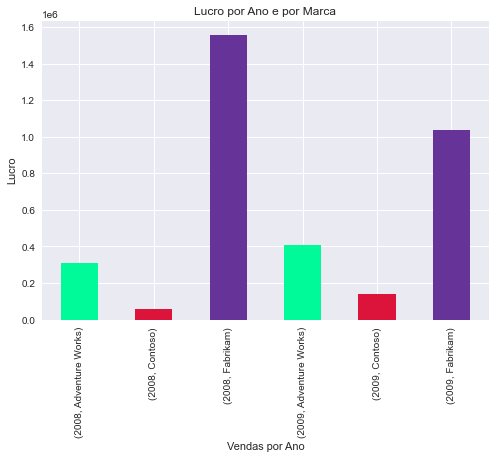

In [77]:
# Gráfico de barras - Lucro por ano e por marca.

df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().plot.bar(title= "Lucro por Ano e por Marca", color= ["mediumspringgreen", "crimson", "rebeccapurple"])
plt.ylabel("Lucro")
plt.xlabel("Vendas por Ano");

In [57]:
# 4- O lucro aumentou de 2008 para 2009?
# O lucro não aumentou em 2009: Podemos perceber que o Lucro foi menor, cerca de R$342.332,33 a menos. A marca que mais gerou impacto no lucro total foi a Adventure Works. 

round(df.groupby(df["Data Venda"].dt.year)["Lucro"].sum(), 2)

Data Venda
2008    1920077.71
2009    1577745.38
Name: Lucro, dtype: float64

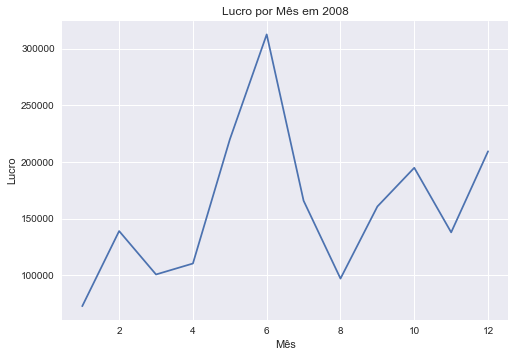

In [72]:
# Visualização de vendas por mês em 2008:

df_2008 = df[df["Data Venda"].dt.year == 2008]

df_2008.groupby(df_2008["Data Venda"].dt.month)["Lucro"].sum().plot(title= "Lucro por Mês em 2008")
plt.xlabel("Mês")
plt.ylabel("Lucro");

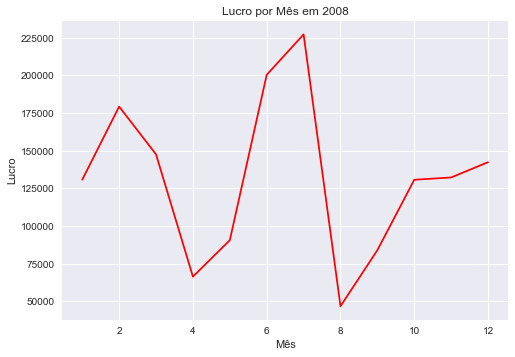

In [73]:
# Visualização de vendas por mês em 2009:

df_2009 = df[df["Data Venda"].dt.year == 2009]

df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title= "Lucro por Mês em 2008", color= "r")
plt.xlabel("Mês")
plt.ylabel("Lucro");

In [129]:
# 5- Qual é o tempo de envio dos produtos?
# Para responder essa pergunta iremos adicionar uma nova coluna:

df["Tempo de envio"] = df["Data Envio"] - df["Data Venda"]


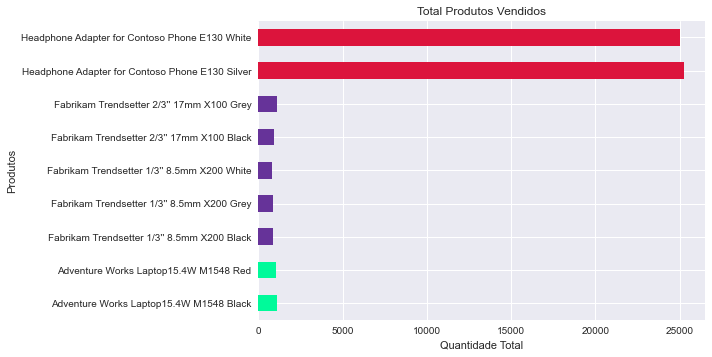

In [133]:
# 6- Quais os produtos mais vendidos?

df.groupby("Produto")["Quantidade"].sum().plot.barh(title= "Total Produtos Vendidos", color= ["mediumspringgreen", "mediumspringgreen", "rebeccapurple", "rebeccapurple", "rebeccapurple", "rebeccapurple", "rebeccapurple", "crimson", "crimson"])
plt.xlabel("Quantidade Total")
plt.ylabel("Produtos");


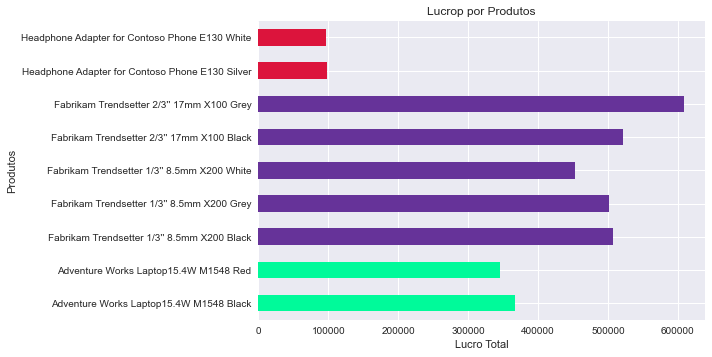

In [132]:
# 7- Quais produtos são mais lucrativos?

df.groupby("Produto")["Lucro"].sum().plot.barh(title= "Lucrop por Produtos", color= ["mediumspringgreen", "mediumspringgreen", "rebeccapurple", "rebeccapurple", "rebeccapurple", "rebeccapurple", "rebeccapurple", "crimson", "crimson"])
plt.xlabel("Lucro Total")
plt.ylabel("Produtos");